# XAI CODE DEMO

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIPI-590-XAI/Duke-AI-XAI/blob/dev/explainable-ml-example-notebooks/global_explanations.ipynb)

# Global Explanations 🌎

Table of Contents
* [Partial Dependence Plots](https://colab.research.google.com/drive/1WhBODDgVGE4NdnWtCouRuFn8rj0oxT6K#scrollTo=b9WMrsxrSc4Z&line=1&uniqifier=1)
* [ALE Plots](https://colab.research.google.com/drive/1WhBODDgVGE4NdnWtCouRuFn8rj0oxT6K#scrollTo=H4na5VBGOath&line=6&uniqifier=1)
* [Permutation Feature Importance](https://colab.research.google.com/drive/1WhBODDgVGE4NdnWtCouRuFn8rj0oxT6K#scrollTo=SLIGY1TLbSVm&line=21&uniqifier=1)
* [Feature Interaction](https://colab.research.google.com/drive/1WhBODDgVGE4NdnWtCouRuFn8rj0oxT6K#scrollTo=Fn1TE2O-aByw&line=6&uniqifier=1)

In [9]:
!pip install numpy==1.25.2 pandas==2.0.3 scikit-learn==1.2.2 shap==0.45.1
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 47.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-srljlw4b/alepython_ae441c4d3b3845078ea8681c6258052f
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-srljlw4b/alepython_ae441c4d3b3845078ea8681c6258052f
  Resolved https://github.com/MaximeJumell

In [10]:
# Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Models
import xgboost
from sklearn.model_selection import train_test_split

# XAI
import shap
from alepython import ale_plot
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

np.random.seed(1)

# Using IMDB DATASET
### The dataset I chose had a problematic row

In [14]:
import pandas as pd

data = pd.read_csv(
    "src/TMDB_movie_dataset_v11.csv",
    engine="python",        # more flexible parser
    on_bad_lines="skip"     # skip problematic rows
)


# Inspecting the data
## I made it 1000000 because I wanted to see if I had at least a million inputs

In [17]:
data.head(1000000)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,568327,Prom Queen,0.000,0,Released,2007-01-01,0,27,False,NaN,...,Prom Queen,The life/trials/dreams of a teenage girl.,0.842,/qNDTlIMXeXOCtAx7XuwGGMZJs8b.jpg,NaN,NaN,NaN,NaN,NaN,NaN
999996,370552,TS Bad Girls,0.000,0,Released,2015-11-18,0,110,True,NaN,...,TS Bad Girls,The transition from girl to woman can be tough...,0.600,NaN,These troubled TS teens need constant stimulation,Romance,TransSensual,Canada,English,transsexual
999997,568363,A volatile tale,0.000,0,Released,2017-05-31,0,44,False,/t299xqwweTPiKA1vh5aiyp1WKaC.jpg,...,Una storia volatile,A visual poem on the city of Rome.,0.600,/5ot5VKYOUthJGW7nr5vZ1YGgpKB.jpg,Pausing at a window reveals that looking and l...,Documentary,Sincerely Cinema,Italy,Italian,NaN
999998,568293,Pachamama,0.000,0,Released,2016-02-01,0,0,False,NaN,...,Pachamama,NaN,0.600,/uhmixFk27gzPxErvJcbklVJzzMr.jpg,NaN,NaN,NaN,NaN,"English, Italian",NaN


## Dropping rows

In [18]:
# Drop rows with missing values in important cols
data = data.dropna(subset=["budget", "popularity", "runtime", "vote_average", "vote_count"])

## The training was taking long so I decided to reduce my dataset
# Sampled Data

In [23]:
data_sampled = data.sample(50000, random_state=42)


In [27]:
data_sampled.head(50000)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
303116,610916,La banda de los cholos 2,5.0,1,Released,2000-01-01,0,0,False,NaN,...,La banda de los cholos 2,NaN,0.871,NaN,NaN,NaN,NaN,Mexico,Spanish,NaN
431196,1241552,Take Your Time: Arayashiki,0.0,0,Released,2015-05-01,0,117,False,NaN,...,アラヤシキの住人たち,"This documentary was filmed at Maki, a small c...",0.600,/sfOMPxbVofZJ1MTGs2nLP1KQUjm.jpg,NaN,Documentary,Pole Pole Times,Japan,Japanese,NaN
458501,1102689,Mahanubhavaru,0.0,0,Released,2017-11-17,0,0,False,NaN,...,Mahanubhavaru,Mahanubhavaru (meaning: VIPs) is a 2017 Kannad...,0.600,/yfmGwAG94FhvsKJHWy3hvjgs4tl.jpg,NaN,NaN,NaN,NaN,NaN,NaN
686261,26919,"Goo Goo Dolls Live in Buffalo July 4, 2004",0.0,0,Released,2004-12-31,0,74,False,/nzNyArOStRNQIUHFfWeUYtAeBQY.jpg,...,"Goo Goo Dolls Live in Buffalo July 4, 2004",Setlist: 01 - Big Machine / 02 - Naked / 03 - ...,0.600,/vhFcVZLoKO2kE9oAeHhl60bno9K.jpg,NaN,NaN,NaN,NaN,NaN,NaN
753976,68947,Petter och Lotta på äventyr,0.0,0,Released,1970-01-01,0,0,False,/wxTvz4Wj4KtAHxdPkVshRyDEglK.jpg,...,Petter och Lotta på äventyr,NaN,0.600,/eL1GB0Vnhm87lDllFIztfoqntGM.jpg,NaN,NaN,NaN,NaN,Swedish,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149181,112655,Idol of the Crowds,4.8,3,Released,1937-09-30,0,60,False,/4XIHZx1f0Cat6AuzmVmLgzxAzTe.jpg,...,Idol of the Crowds,"Retired hockey player Johnny Hansen, in order ...",1.621,/n6Iycem5BxblofUqvlUr6vGfbDA.jpg,NaN,"Drama, Romance",Universal Pictures,United States of America,English,"sports, ice hockey"
546871,1184033,Mad Professor,0.0,0,Released,2011-02-01,0,200,True,NaN,...,Mad Professor,Logan shows up for counseling. Omar's advises ...,0.000,/n9VBv6mIklCE0PbiF8yNonBp7d4.jpg,NaN,NaN,Evil Angel,NaN,NaN,NaN
230620,455567,This Cold Life,5.0,1,Released,2017-04-27,0,88,False,/g72UulUAJhwSYFwl3741SPbTWmc.jpg,...,This Cold Life,"Welcome to Longyearbyen, the only settlement i...",0.600,/74ft2ouAs6RrrEI0FParSPtopah.jpg,NaN,Documentary,NaN,"Norway, United States of America",English,NaN
654635,1548795,record found here,0.0,0,Released,NaN,0,18,False,NaN,...,record found here,Inspired by a story her grandmother shared abo...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##defining target and features
## chose just four features to help me interpret better since they are figures and would be easier to work with

In [28]:
X = data_sampled[["budget", "popularity", "runtime", "vote_count"]]
y = data_sampled["vote_average"]

In [29]:
from sklearn.ensemble import RandomForestRegressor
# Train RandomForestRegressor model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Partial Dependence Plots (PDP) 📈

A Partial Dependence Plot (PDP or PD) shows the marginal effect one or two features have on the predicted outcome of a model [Paper, 2001](https://jerryfriedman.su.domains/ftp/trebst.pdf)

**How it Works:**
1. Select feature of interest
2. For every instance in training dataset:
* Keep all other features the same, create variants of the instance by replacing the feature’s value with values from a grid
* Make predictions with the black box model for newly created instances
* You now have a set of points for an instance with the feature value from the grid and the respective predictions
3. Average across all instances and plot

Here we will show both a built-in library implementation, [scikit learn's Partial Dependence Display](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html) and we will build our own implementation in numpy.


#### Using PartialDependenceDisplay (ICE PLOT)

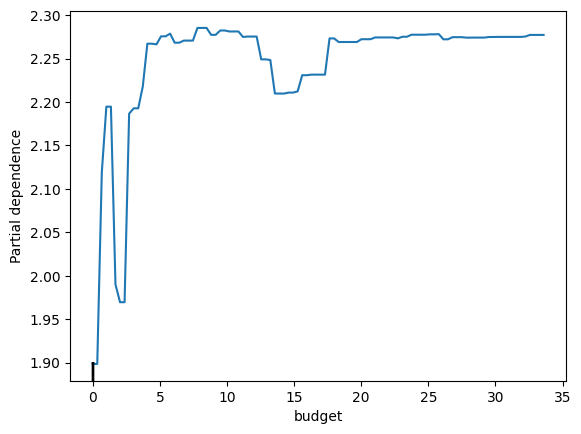

In [31]:
# Choose the feature of interest
features = ["budget"]

# Use PartialDependenceDisplay to plot PDP
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='average') #kind='both'

#### Build our own PDP with numpy

When we build our own, you will notice we build our own grid of values and can change the size of our grid.

This is why you may see slight variations between the PDP created with numpy versus the PartialDependenceDisplay from scikit learn.

/tmp/ipython-input-3664276629.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2620253.164556962' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_modified.iloc[:, feature_index] = value


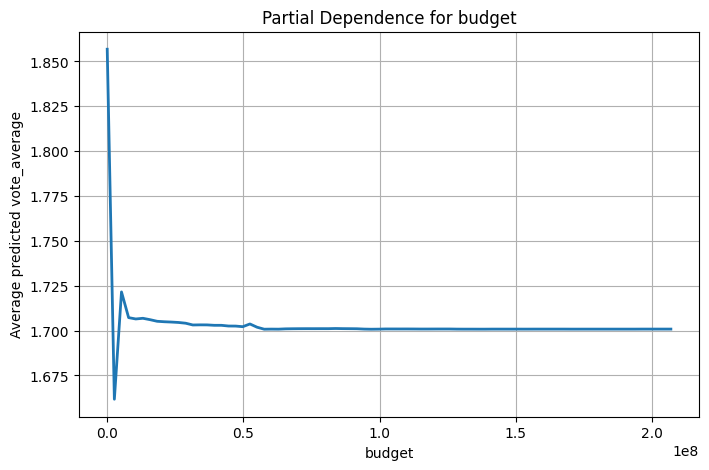

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Choose the feature for which you want to plot partial dependence
feature_index = 0  # 0 = budget, 1 = popularity, 2 = runtime, 3 = vote_count
feature_name = X.columns[feature_index]

# Create a grid of values for the chosen feature
feature_values = np.linspace(
    np.min(X.iloc[:, feature_index]),
    np.max(X.iloc[:, feature_index]),
    num=80
)

# Initialize array to store average predictions
average_predictions = np.zeros_like(feature_values)

# Duplicate the dataset to modify feature values
X_modified = X.copy()

# Loop over feature values
for i, value in enumerate(feature_values):
    # Replace chosen feature with the current grid value
    X_modified.iloc[:, feature_index] = value

    # Predict using the modified dataset
    predictions = model.predict(X_modified)

    # Store the average prediction
    average_predictions[i] = np.mean(predictions)

# Plot the partial dependence for the chosen feature
plt.figure(figsize=(8,5))
plt.plot(feature_values, average_predictions, linewidth=2)
plt.xlabel(feature_name)
plt.ylabel("Average predicted vote_average")
plt.title(f"Partial Dependence for {feature_name}")
plt.grid(True)
plt.show()


When we build our own PDP, we can run interesting experiments, like the one below, where we can see the impact of changing the size of our grid.

#### How to Interpret

* Look at the shape of the curve on the plot. Is it linear, non-linear, or does it have any particular pattern? This gives you insights into how the feature affects the prediction.

* Determine whether increasing or decreasing values of the feature variable lead to higher or lower predictions. Does the curve slope upwards, downwards, or remain relatively flat?

* Note whether the curve reaches a plateau or has any upper or lower limits. This indicates whether there's a point beyond which changing the feature variable has little effect on the prediction.

* Consider how the observed relationships align with your understanding of the problem domain. Are the results intuitive? Do they make sense based on what you know about the data?


/tmp/ipython-input-323852645.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '10894736.842105264' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_modified.iloc[:, feature_index] = value
/tmp/ipython-input-323852645.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '9857142.857142856' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_modified.iloc[:, feature_index] = value
/tmp/ipython-input-323852645.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7961538.461538462' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_modified.iloc[:, feature_index] = value
/tmp/ipython-input-323852645.py:38: FutureWarning: Setting an item of incompatible dtyp

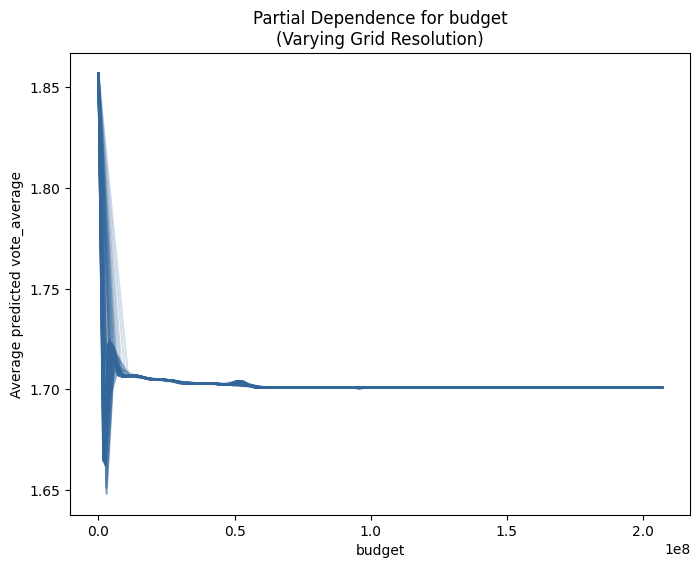

In [34]:
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import numpy as np

# Pick the feature index (0 = budget, 1 = popularity, 2 = runtime, 3 = vote_count)
feature_index = 0
feature_name = X.columns[feature_index]

# Define different grid lengths (how many points we evaluate PDP on)
grid_lengths = np.linspace(20, 120, 40).astype(int)

fig, ax = plt.subplots(figsize=(8, 6))

# Define a base color and alpha (transparency) values
base_color = (0.2, 0.4, 0.6)  # Blue-ish color
min_alpha = 0.2
max_alpha = 1.0

# Normalize grid_lengths between 0 and 1 for transparency scaling
normalized_g = (grid_lengths - grid_lengths.min()) / (grid_lengths.max() - grid_lengths.min())

for i, g in enumerate(grid_lengths):
    # Create feature grid with g points
    feature_values = np.linspace(
        np.min(X.iloc[:, feature_index]),
        np.max(X.iloc[:, feature_index]),
        num=g
    )

    # Initialize array to store average predictions
    average_predictions = np.zeros_like(feature_values, dtype=float)

    # Duplicate the dataset to modify feature values
    X_modified = X.copy()

    # Loop over feature values
    for j, value in enumerate(feature_values):
        X_modified.iloc[:, feature_index] = value
        predictions = model.predict(X_modified)
        average_predictions[j] = np.mean(predictions)

    # Calculate color with alpha based on grid length
    alpha = min_alpha + (max_alpha - min_alpha) * normalized_g[i]
    color = to_rgba(base_color, alpha)

    # Plot the partial dependence curve
    ax.plot(feature_values, average_predictions, color=color)

ax.set_xlabel(feature_name)
ax.set_ylabel("Average predicted vote_average")
ax.set_title(f"Partial Dependence for {feature_name}\n(Varying Grid Resolution)")
plt.show()


## ALE Plots 📉

Accumulated Local Effects (ALE) Plots [Paper, 2020](https://www.scholars.northwestern.edu/en/publications/visualizing-the-effects-of-predictor-variables-in-black-box-super)

**How to create an ALE plot:**
1. Bin the Feature: Divide the feature of interest into several intervals (bins). These bins help in managing the data and computing local effects within smaller, more manageable segments.
2. Compute Local Effects: For each bin, calculate the local effect of the feature on the prediction. This involves: Calculating the change in prediction when moving from the lower to the upper edge of the bin
Averaging this change over all instances that fall into that bin
3. Accumulate Effects: Starting from the first bin, accumulate the local effects across all bins. Sum up the average effects sequentially to show how the feature influences the prediction as its value changes
4. Centering: To make the plot more interpretable, center the accumulated effects around zero. Subtract the mean of the accumulated effects, which forces the interpretation to focus on deviations from the average prediction

There are a few python implementations of ALE plots, here we show the [ALEPython implementation](https://github.com/blent-ai/ALEPython).

The implementation is more complex and less intuitive than PDPs, with many hyperparameters, including:
* **bins** - This parameter defines the number of bins to divide the range of the specified feature into. A larger number of bins can provide more granularity in the ALE plot but might also increase computation time.
* **monte_carlo** - This parameter is a boolean flag indicating whether to use Monte Carlo sampling to estimate the ALE. Monte Carlo sampling can be beneficial when the number of samples in the dataset is large, as it reduces computational burden.
* **monte_carlo_rep** - This parameter specifies the number of Monte Carlo replicates to use for estimating the ALE. More replicates can lead to a more accurate estimation but may also increase computation time.
* **monte_carlo_ratio** - This parameter determines the proportion of the dataset to use for Monte Carlo sampling. It's a value between 0 and 1, where 1 means using the entire dataset. Using a smaller ratio can speed up computation but may introduce some sampling error.


This can take a couple of minutes to run:

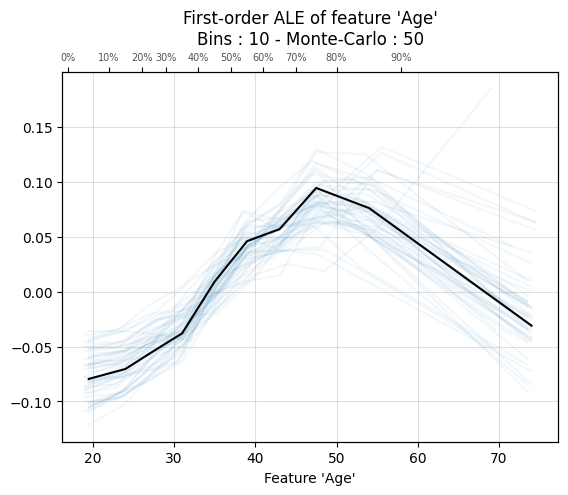

<Axes: title={'center': "First-order ALE of feature 'Age'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'Age'">

In [ ]:
# Use default parameters for 1D Main Effect ALE Plot
ale_plot(model, X_train, 'budget', monte_carlo=True)

In [ ]:
# Change hyperparameters for 1D Main Effect ALE Plot
ale_plot(
    model,
    X_train,
    "budget",
    bins=5,
    monte_carlo=True,
    monte_carlo_rep=30,
    monte_carlo_ratio=0.5,
)

#### How to Interpret 1D Main Effect ALE Plot



* X-axis represents feature values
* Y-axis shows average effect on predictions
* Each curve represents a feature's ALE. - Flat curves imply little impact; steep curves, significant impact
* Upward curves: increasing feature value increases predictions; downward, the opposite
* Steeper curves signify larger effects

We can compare ALE plots to gauge relative feature importance.
Features with steeper curves have larger impacts.

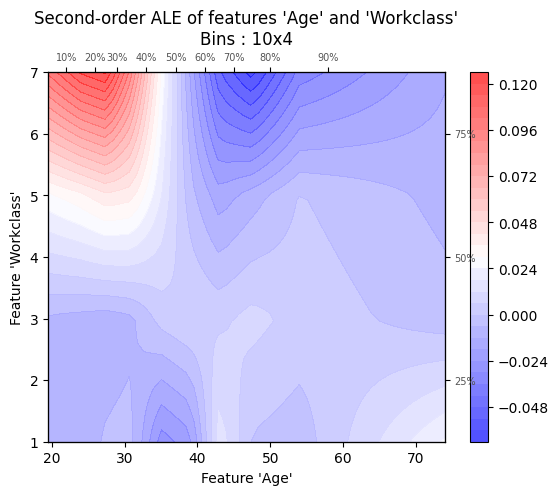

<Axes: title={'center': "Second-order ALE of features 'Age' and 'Workclass'\nBins : 10x4"}, xlabel="Feature 'Age'", ylabel="Feature 'Workclass'">

In [ ]:
# 2D Second-Order ALE Plot
ale_plot(model, X_train, X_train.columns[:2], bins=10)

#### How to Interpret - 2D Second-Order ALE Plot

* Both axes represent the values of the two features being analyzed.
* Each axis corresponds to one of the features.
* The plot displays a surface where the height represents the average effect on predictions. Higher points indicate regions where the model tends to make higher predictions, and vice versa.
* Patterns in the surface reveal how the joint behavior of the two features affects the model's predictions. Peaks or valleys suggest regions where the joint effect is particularly strong.
* The direction of the slope indicates whether increasing one feature while holding the other constant tends to increase or decrease predictions. Steeper slopes represent larger effects, while flatter regions indicate smaller effects.


We can compare the 2D Second-Order ALE Plot with individual ALE plots for each feature to understand how joint effects differ from marginal effects.